In [ ]:
import pandas as pd
import numpy as np
import sklearn.model_selection as sk
from   sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns

from prepare import prepare_data





In [ ]:
# load data from csv
df = pd.read_csv("virus_data.csv", sep=",", header=0)

# Set the random state based on the sum of the last two digits of your IDs
random_state = sum([51, 17])  # Replace [1, 2, 3] with your actual IDs

train, test = sk.train_test_split(df, test_size=0.2, train_size=0.8, random_state=random_state)

# create prepared data
train_set = train.copy()
test_set = test.copy()
train_set = prepare_data(train, train_set)
test_set = prepare_data(train, test_set)


In [ ]:
def visualize_clf(clf, X, Y, title, 
                  xlabel, ylabel,
                  marker_size=50,
                  grid_length=300,
                  linewidths=None):
    import matplotlib.pyplot as plt
    import pandas as pd
    from matplotlib.colors import ListedColormap
    
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()
        
    # For internal use here, make sure labels are 0 and 1
    Y = np.ravel(Y).astype(int)
    labels = set(Y)
    assert len(labels) == 2, "Can only visualize two unique labels"

    if labels == set([-1,1]):
      Y = (Y + 1) // 2
      labels = set(Y)
    
    assert labels == set([0,1]), "Could not handle given labels"

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["D", "o"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(labels, palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size,
                    linewidths=linewidths)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()
   

c:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


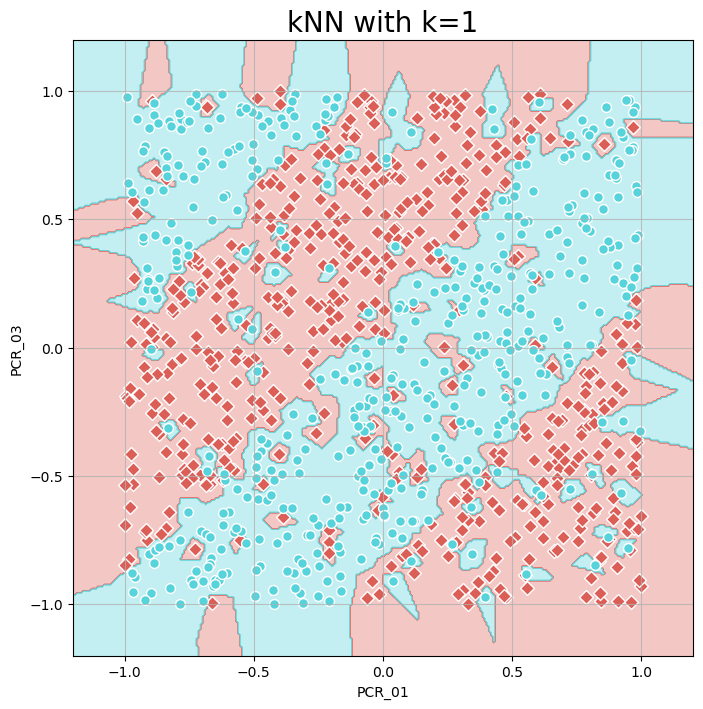

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create pcr_01 and pcr_03 temp df from train_set
PCR_01_03_train_set = train_set[["PCR_01", "PCR_03"]]

# init classifier for k=1 and fit to data
knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(PCR_01_03_train_set, train_set["spread"])

# visualize
visualize_clf(knn_classifier, PCR_01_03_train_set, train_set["spread"], "kNN with k=1", "PCR_01", "PCR_03")
# test_accuracy = knn_classifier.score(test_set[["PCR_01","PCR_03"]], test_set["spread"])
# print("test accuracy:", test_accuracy) 

Best k: 5
Validation accuracy: 0.86
Training accuracy: 0.8845714285714286


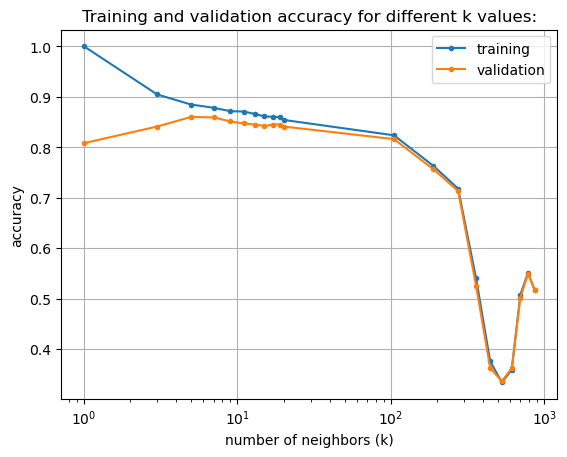

In [ ]:
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt


spread_col = train_set["spread"]

k_vals = list(range(1, 20, 2)) + list(range(20, 871, 85))
validation_scores = []
train_scores = []
for k in k_vals:
    # create instance with K = k
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    # cross-validation:
    validation = cross_validate(knn_classifier, PCR_01_03_train_set, spread_col, cv=8, return_train_score=True)
    validation_scores.append(np.mean(validation['test_score']))
    train_scores.append(np.mean(validation["train_score"]))

# plotting
plt.semilogx(k_vals, train_scores, label="training", marker=".")
plt.semilogx(k_vals, validation_scores, label="validation", marker=".")
plt.grid(True)
plt.xlabel("number of neighbors (k)")
plt.ylabel("accuracy")
plt.title("Training and validation accuracy for different k values:")
plt.legend()

# find the best result
max_i = np.argmax(validation_scores)
print("Best k:", k_vals[max_i])
print("Validation accuracy:", validation_scores[max_i])
print("Training accuracy:", train_scores[max_i])


c:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


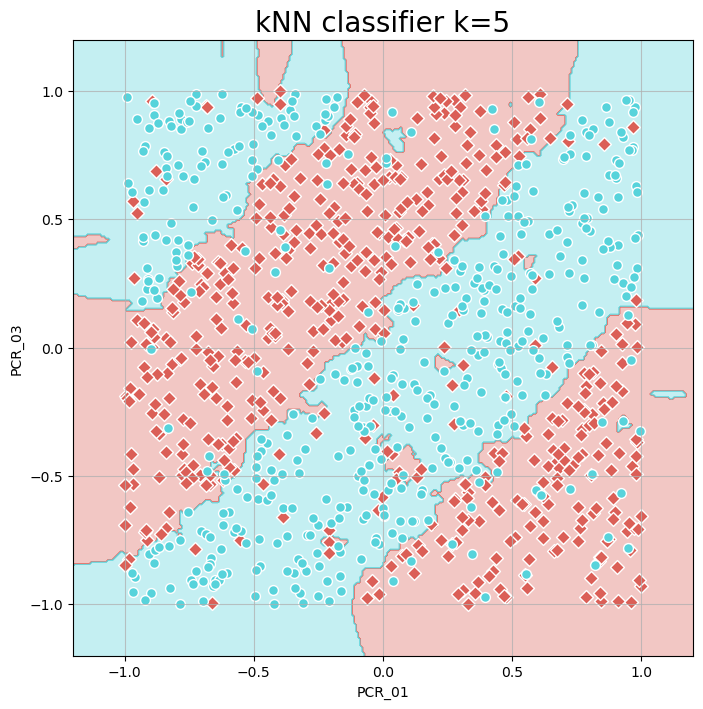

test accuracy: 0.844


In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(PCR_01_03_train_set, spread_col)

visualize_clf(knn_classifier, PCR_01_03_train_set, train_set["spread"], "kNN classifier k=5", "PCR_01", "PCR_03")
test_accuracy = knn_classifier.score(test_set[["PCR_01","PCR_03"]], test_set["spread"])

print("test accuracy:", test_accuracy) 

decision Tree with depth=3 training accuracy: 0.701


[Text(0.5, 0.875, 'PCR_02 <= -0.427\nentropy = 0.999\nsamples = 1000\nvalue = [485, 515]\nclass = -1'),
 Text(0.25, 0.625, 'SpecialProperty <= 0.0\nentropy = 0.899\nsamples = 216\nvalue = [68, 148]\nclass = -1'),
 Text(0.125, 0.375, 'PCR_06 <= 0.025\nentropy = 1.0\nsamples = 110\nvalue = [54, 56]\nclass = -1'),
 Text(0.0625, 0.125, 'entropy = 0.657\nsamples = 53\nvalue = [44, 9]\nclass = 1'),
 Text(0.1875, 0.125, 'entropy = 0.67\nsamples = 57\nvalue = [10, 47]\nclass = -1'),
 Text(0.375, 0.375, 'PCR_09 <= -0.278\nentropy = 0.563\nsamples = 106\nvalue = [14, 92]\nclass = -1'),
 Text(0.3125, 0.125, 'entropy = 0.235\nsamples = 52\nvalue = [2, 50]\nclass = -1'),
 Text(0.4375, 0.125, 'entropy = 0.764\nsamples = 54\nvalue = [12, 42]\nclass = -1'),
 Text(0.75, 0.625, 'PCR_02 <= 0.551\nentropy = 0.997\nsamples = 784\nvalue = [417, 367]\nclass = 1'),
 Text(0.625, 0.375, 'PCR_06 <= -0.563\nentropy = 0.975\nsamples = 581\nvalue = [344, 237]\nclass = 1'),
 Text(0.5625, 0.125, 'entropy = 0.877\nsam

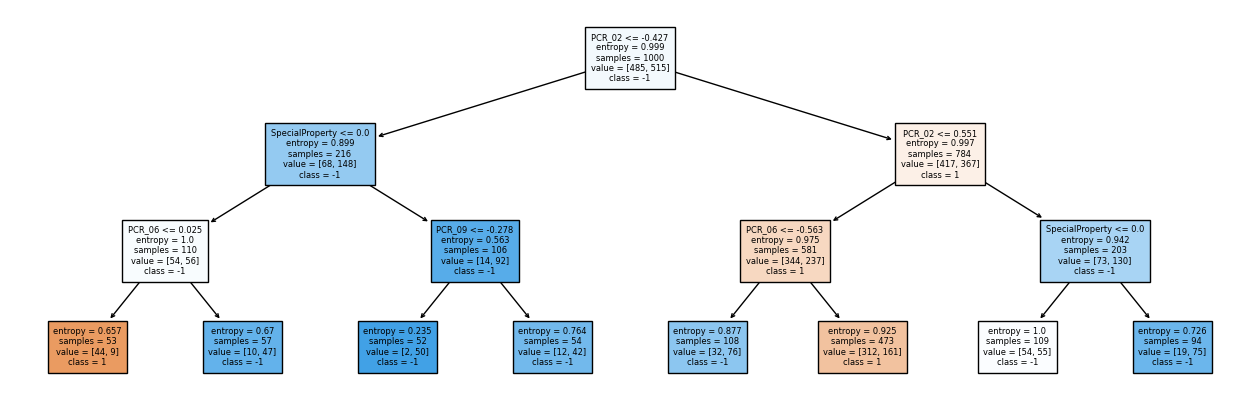

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
train_set_cpy = train_set.copy()
train_set_cpy = train_set_cpy.drop(columns=["spread","risk"])

risk_col = train_set["risk"]

decision_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3)
decision_tree.fit(train_set_cpy, risk_col)

training_accuracy = decision_tree.score(train_set_cpy, risk_col)
print("decision Tree with depth=3 training accuracy:", training_accuracy)
feature_names = train_set_cpy.columns.tolist()  # Convert column names to a list

plt.figure(figsize=(16, 5))
plot_tree(decision_tree, 
          feature_names=feature_names, 
          class_names=risk_col.unique().astype(str),  # Convert class names to strings if not already
          max_depth=3, 
          filled=True, 
          fontsize=6)


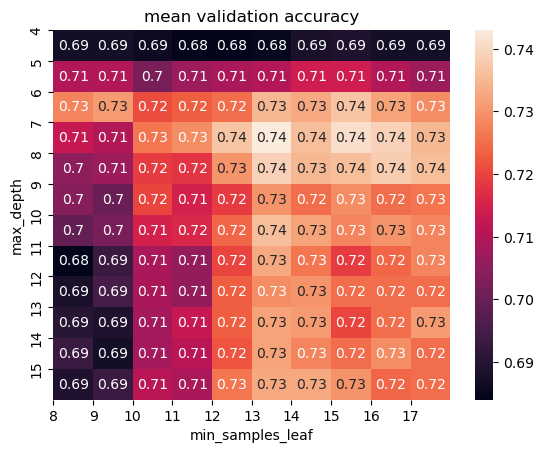

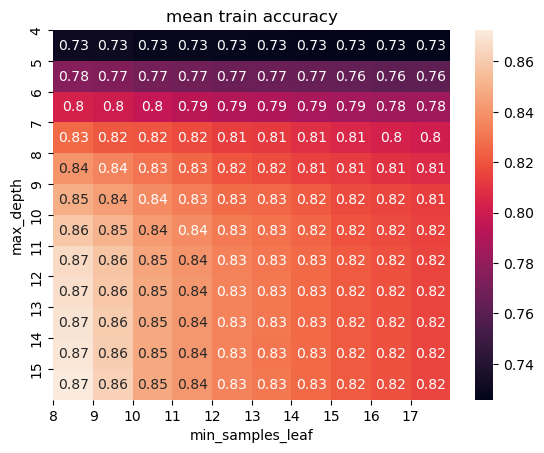

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import seaborn


# temp_train = pd.DataFrame(train_set)
# temp_train = temp_train[temp_train.columns.difference(['risk'])]
leafRange = range(8,18)
depthRange = range(4,16)

parameters = {'min_samples_leaf':leafRange, 'max_depth':depthRange}
treeClassifier = DecisionTreeClassifier(criterion='entropy')

clf = GridSearchCV(treeClassifier, parameters, cv=KFold(n_splits=8), return_train_score=True)
clf.fit(train_set_cpy, train_set['risk'])

scores = clf.cv_results_['mean_test_score'].reshape(len(depthRange), len(leafRange))
ax = seaborn.heatmap(scores, annot=True)

plt.xticks(np.arange(len(leafRange)), leafRange)
plt.yticks(np.arange(len(depthRange)), depthRange)

ax.set(xlabel="min_samples_leaf", ylabel="max_depth")

plt.title("mean validation accuracy")
plt.show()

scores = clf.cv_results_['mean_train_score'].reshape(len(depthRange), len(leafRange))
bx = seaborn.heatmap(scores, annot=True)
plt.xticks(np.arange(len(leafRange)), leafRange)
plt.yticks(np.arange(len(depthRange)), depthRange)
bx.set(xlabel="min_samples_leaf", ylabel="max_depth")
plt.title("mean train accuracy")
plt.show()

In [ ]:
test_set_cpy = test_set.copy()
test_set_cpy = test_set_cpy.drop(columns=["spread","risk"])

tree_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=8, min_samples_leaf=14)
tree_classifier.fit(train_set_cpy, risk_col)
score = tree_classifier.score(test_set_cpy, test_set["risk"])
print("Desicion Tree max_depth=8 min_samples_leaf=14 score:", score)

Desicion Tree max_depth=8 min_samples_leaf=14 score: 0.768


In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np


class SoftSVM(BaseEstimator, ClassifierMixin):
    """
    Custom C-Support Vector Classification.
    """
    def __init__(self, C: float, lr: float = 1e-5):
        """
        Initialize an instance of this class.
        ** Do not edit this method **

        :param C: inverse strength of regularization. Must be strictly positive.
        :param lr: the SGD learning rate (step size)
        """
        self.C = C
        self.lr = lr
        self.batch_size = 32
        self.w = None
        self.b = 0.0

    # Initialize a random weight vector
    def init_solution(self, n_features: int):
        """
        Randomize an initial solution (weight vector)
        ** Do not edit this method **

        :param n_features:
        """
        self.w = np.random.randn(n_features)
        self.b = 0.0

    @staticmethod
    def loss(w, b: float, C: float, X, y):
        """
        Compute the SVM objective loss.

        :param w: weight vector for linear classification; array of shape (n_features,)
        :param b: bias scalar for linear classification
        :param C: inverse strength of regularization. Must be strictly positive.
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: the Soft SVM objective loss (float scalar)
        """
        margins = (X.dot(w) + b).reshape(-1, 1)
        hinge_inputs = np.multiply(margins, y.reshape(-1, 1))
        dim = hinge_inputs.size

        norm = np.linalg.norm(w)
        reg = norm ** 2

        # TODO: complete the loss calculation
        loss = reg + (C * np.maximum(np.zeros((dim, 1)), np.ones((dim, 1)) - hinge_inputs).sum())

        return loss

    @staticmethod
    def subgradient(w, b: float, C: float, X, y):
        """
        Compute the (analytical) SVM objective sub-gradient.

        :param w: weight vector for linear classification; array of shape (n_features,)
        :param b: bias scalar for linear classification
        :param C: inverse strength of regularization. Must be strictly positive.
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: a tuple with (the gradient of the weights, the gradient of the bias)
        """
        # TODO: calculate the analytical sub-gradient of soft-SVM w.r.t w and b
        margins = (X.dot(w) + b).reshape(-1, 1)
        hinge_inputs = np.multiply(margins, y.reshape(-1, 1))
        f = np.where(hinge_inputs < 1, -1, 0)
        g_w = (2 * w) + C * (X * (f * y.reshape(-1, 1))).sum(axis=0)
        g_b = C * (f * y.reshape(-1, 1)).sum()

        return g_w, g_b

    def fit_with_logs(self, X, y, max_iter: int = 2000, keep_losses: bool = True):
        """
        Fit the model according to the given training data.

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets (+1 and -1); array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        :param keep_losses:
        :return: the training losses and accuracies during training
        """
        self.init_solution(X.shape[1])
        losses = []
        accuracies = []

        if keep_losses:
            losses.append(self.loss(self.w, self.b, self.C, X, y))
            accuracies.append(self.score(X, y))

        permutation = np.random.permutation(len(y))
        X = X[permutation, :]
        y = y[permutation]

        for iter in range(0, max_iter):
            start_idx = (iter * self.batch_size) % X.shape[0]
            end_idx = min(X.shape[0], start_idx + self.batch_size)
            batch_X = X[start_idx:end_idx, :]
            batch_y = y[start_idx:end_idx]

            # TODO: Compute the (sub)gradient of the current *batch*
            g_w, g_b = self.subgradient(self.w, self.b, self.C, batch_X, batch_y)

            # Perform a (sub)gradient step
            # TODO: update the learned parameters correctly
            self.w = self.w - (self.lr * (g_w / self.batch_size))
            self.b = self.b - (self.lr * (g_b / self.batch_size))

            if keep_losses:
                losses.append(self.loss(self.w, self.b, self.C, X, y))
                accuracies.append(self.score(X, y))
        return losses, accuracies

    def fit(self, X, y, max_iter: int = 2000):
        """
        Fit the model according to the given training data.
        ** Do not edit this method **

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets (+1 and -1); array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        """
        self.fit_with_logs(X, y, max_iter=max_iter, keep_losses=False)

        return self

    def predict(self, X):
        """
        Perform classification on samples in X.

        :param X: samples for prediction; array of shape (n_samples, n_features)
        :return: Predicted class labels for samples in X; array of shape (n_samples,)
                 NOTE: the labels must be either +1 or -1
        """
        return np.sign((X.dot(self.w) + self.b))

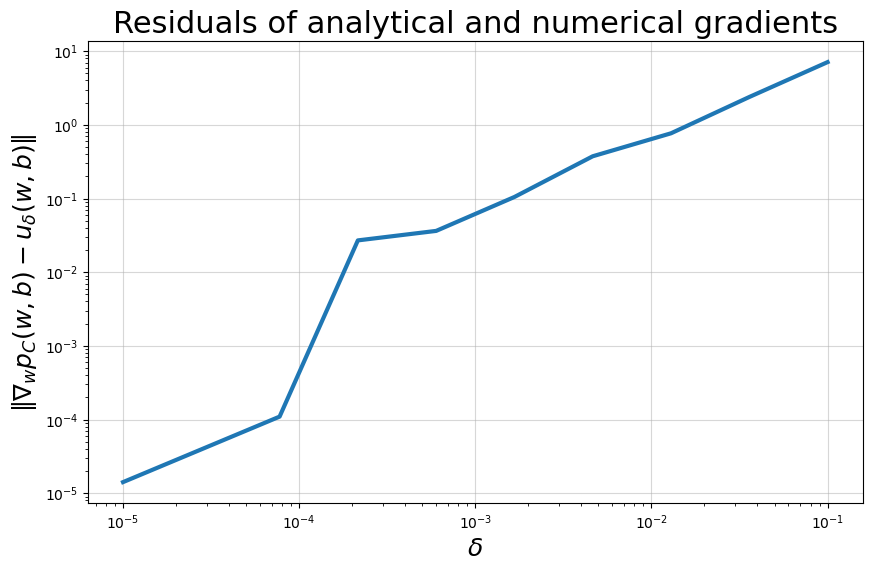

In [ ]:
def numerical_subgradient(w, b, C, X, y, delta=1e-4):
    w_ = w.copy()
    g_w = np.zeros_like(w_)
    orig_objective = SoftSVM.loss(w_, b, C, X, y)
    for i in range(g_w.shape[0]):
        w_[i] += delta
        perturbed_objective = SoftSVM.loss(w_, b, C, X, y)
        w_[i] -= delta
        g_w[i] = (perturbed_objective - orig_objective) / delta

    g_b = (SoftSVM.loss(w_, b + delta, C, X, y) - orig_objective) / delta
    return g_w, g_b

def compare_gradients(X, y, deltas, C=1, REPEATS=100, figsize=(10, 6)):
    residual_means = []

    for delta in deltas:
        residuals = []

        for _ in range(REPEATS):
            # Randomize vectors in which the gradient is computed
            w = np.random.randn(X.shape[1])
            b = np.random.randn(1)

            # Compute the two types of gradients
            analytic_grad = SoftSVM.subgradient(w, b, C, X, y)[0]
            numeric_grad = numerical_subgradient(w, b, C, X, y, delta=delta)[0]

            residual = np.linalg.norm(numeric_grad - analytic_grad)
            residuals.append(residual)

        residual_means.append(np.mean(residuals))

    plt.figure(figsize=figsize)
    plt.title('Residuals of analytical and numerical gradients', fontsize=22)
    plt.plot(deltas, residual_means, linewidth=3)      
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('$\delta$', fontsize=18)
    plt.ylabel(r'$\left\Vert \nabla_{w}p_{C}\left(w,b\right) - u_{\delta} \left(w,b\right)\right\Vert$', fontsize=18)

    plt.grid(alpha=0.5)
    plt.show()

compare_gradients(PCR_01_03_train_set.values,spread_col.values, deltas=np.logspace(-5, -1, 10))

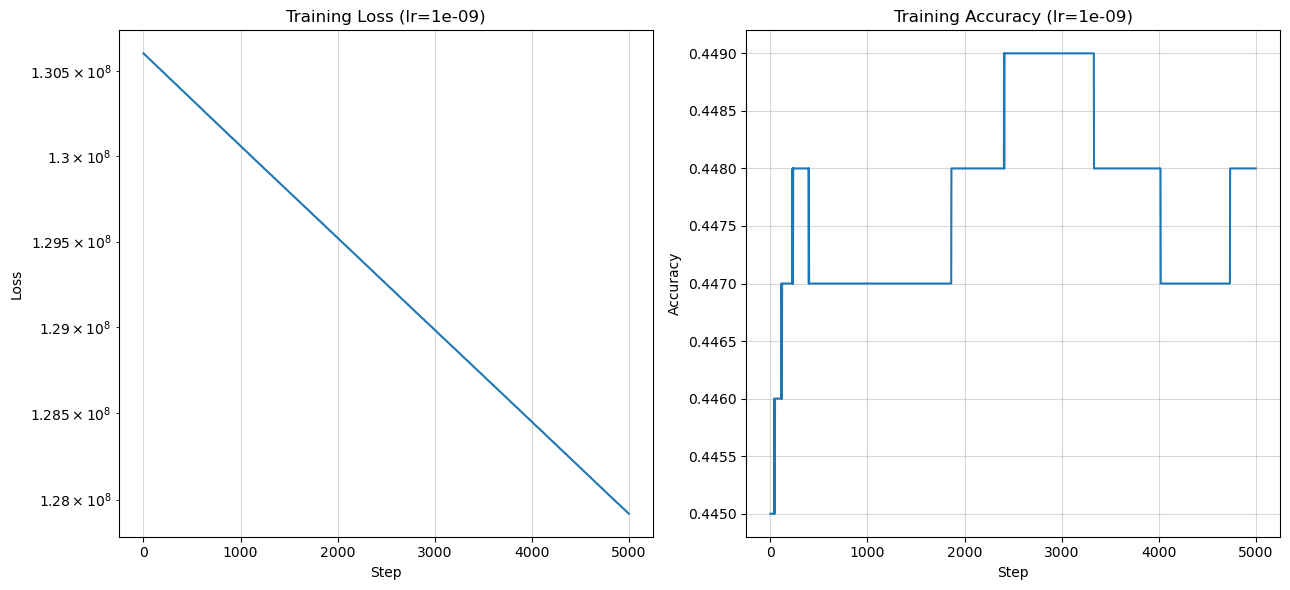

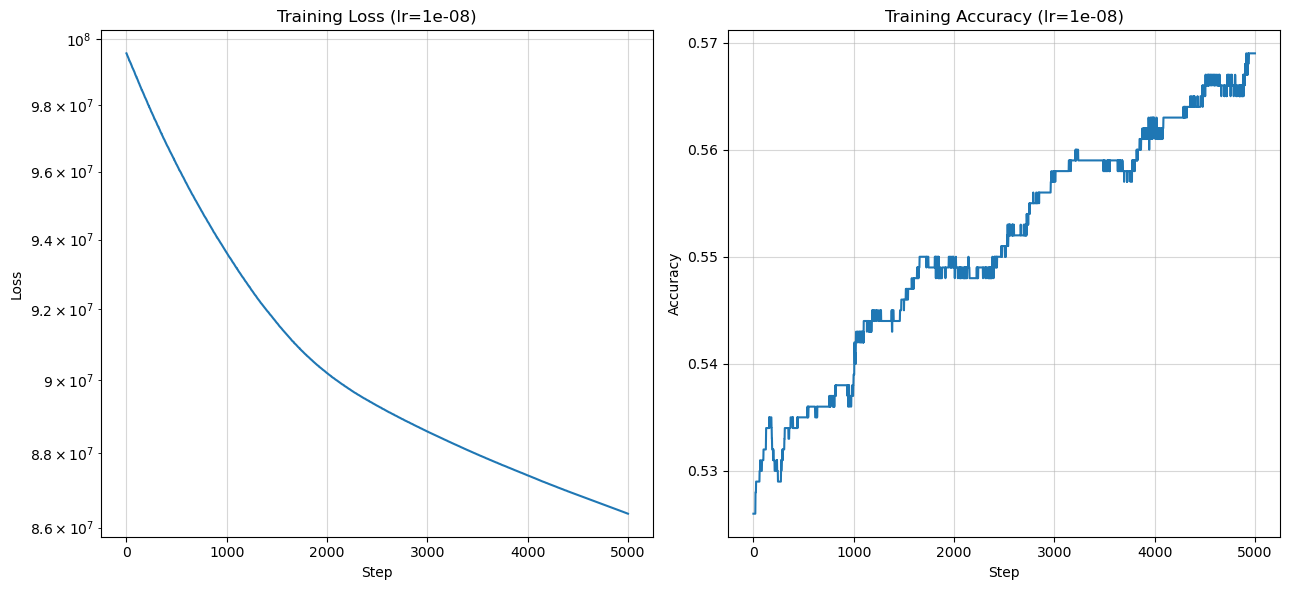

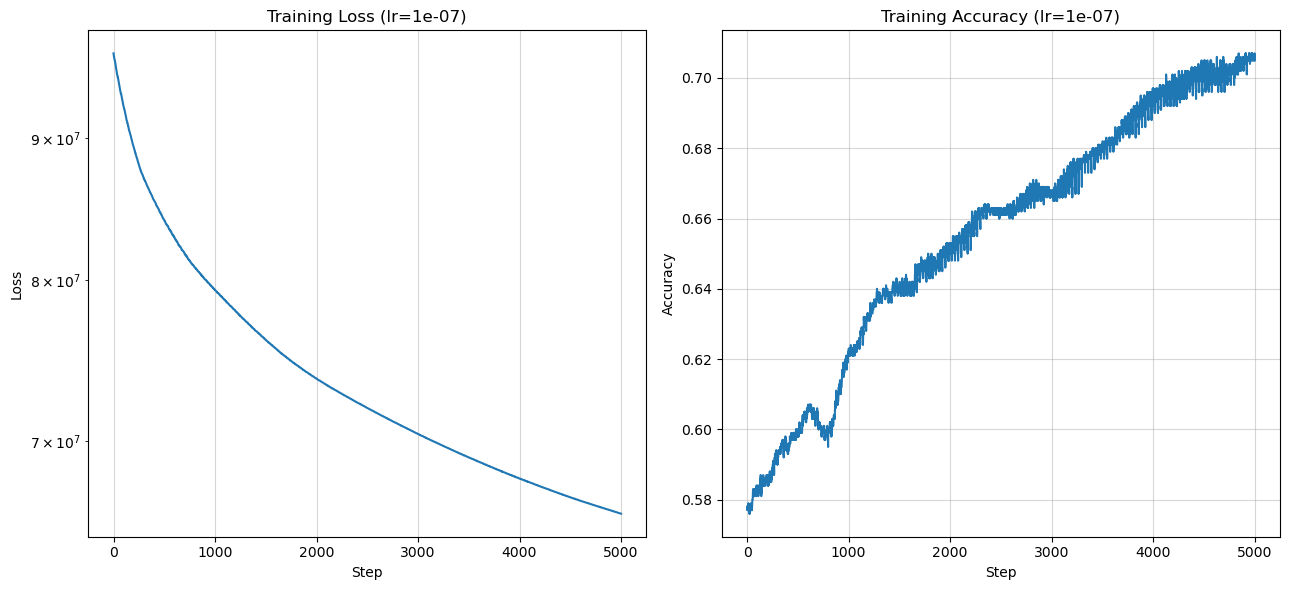

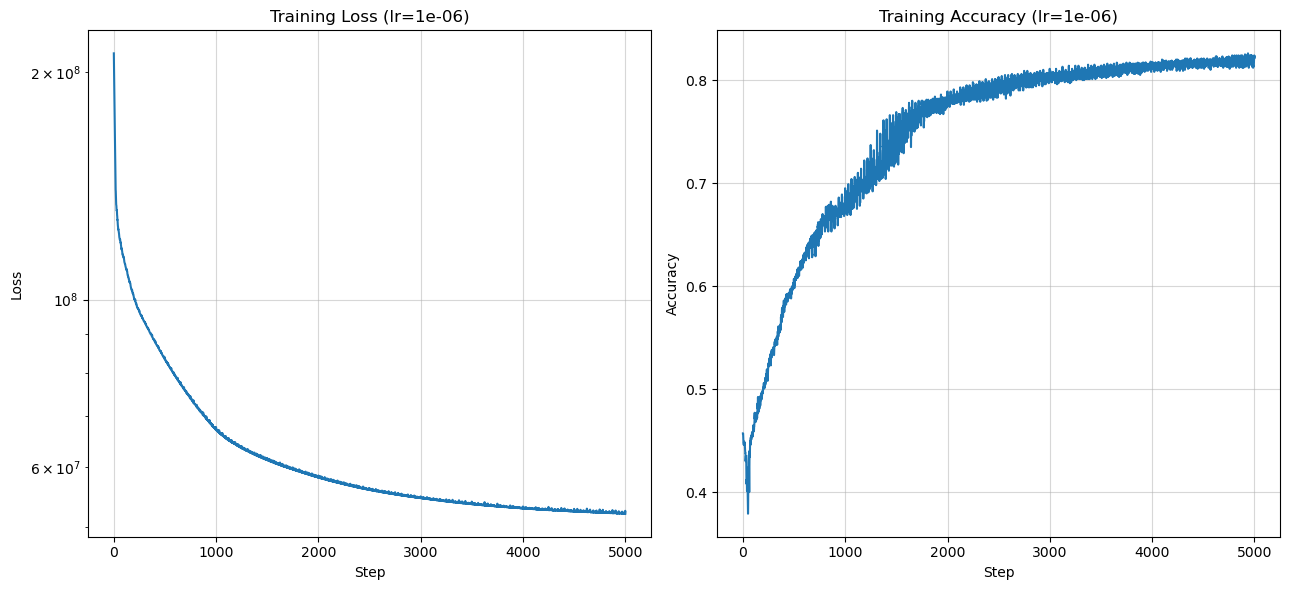

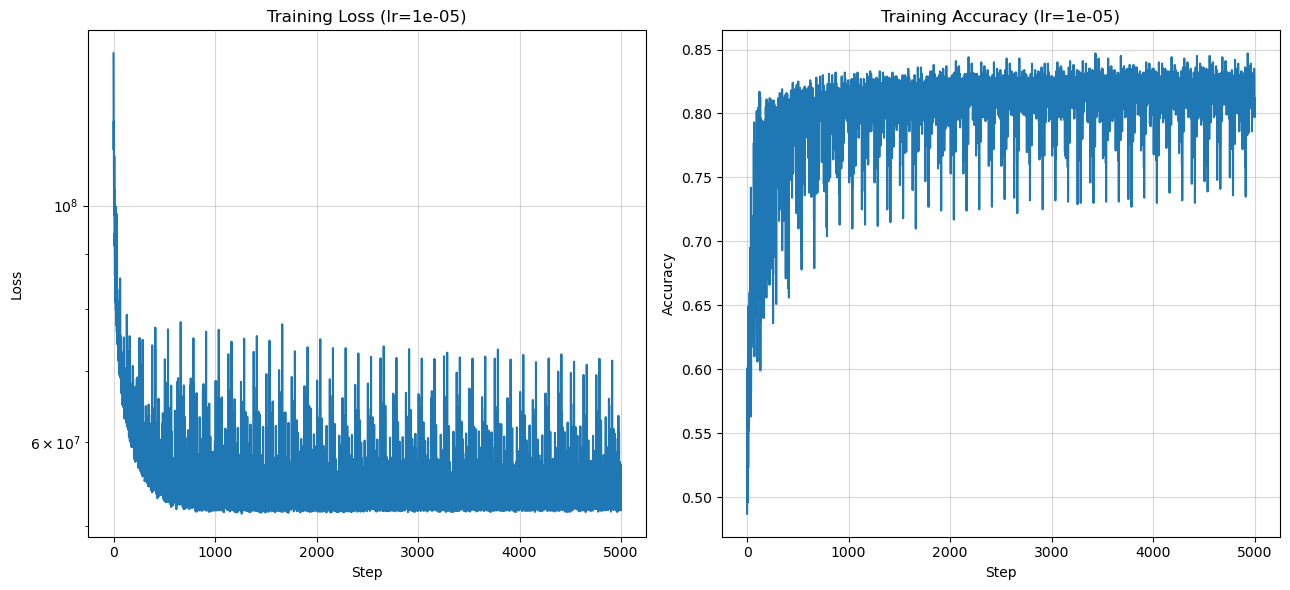

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

learning_rates = np.logspace(-9, -5, 5)
C = 1e5

# Iterate over each learning rate
for lr in learning_rates:
    clf = SoftSVM(C=C, lr=lr)
    Xtrain_poly = PolynomialFeatures(degree=3,).fit_transform(PCR_01_03_train_set.to_numpy())
    Xtrain_poly = MinMaxScaler(feature_range=(-1,1)).fit_transform(Xtrain_poly)
    losses, accuracies = clf.fit_with_logs(Xtrain_poly, spread_col.to_numpy(), max_iter=5000)
    plt.figure(figsize=(13, 6))
    plt.subplot(121), plt.grid(alpha=0.5), plt.title(f"Training Loss (lr={lr})")  # Add lr to the title
    plt.semilogy(losses), plt.xlabel("Step"), plt.ylabel("Loss")
    plt.subplot(122), plt.grid(alpha=0.5), plt.title(f"Training Accuracy (lr={lr})")  # Add lr to the title
    plt.plot(accuracies), plt.xlabel("Step"), plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.show()


c:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


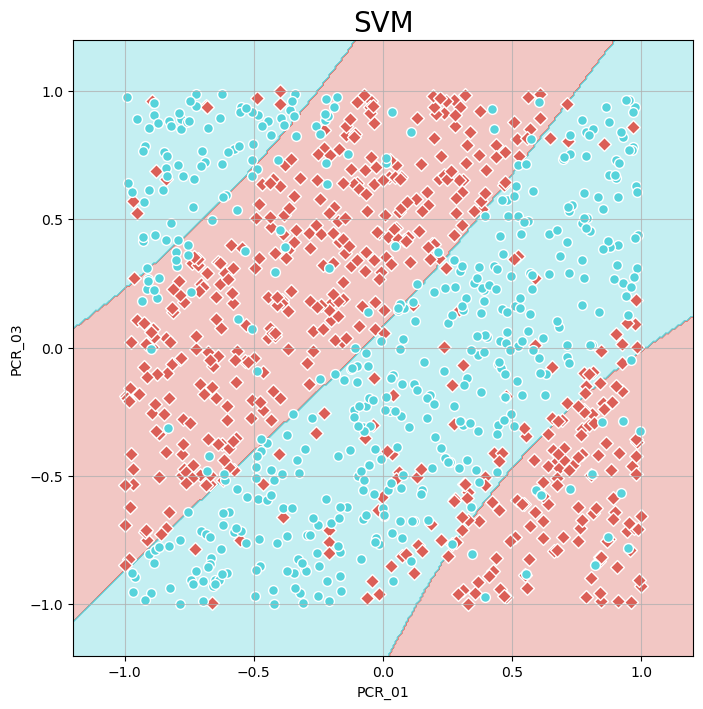

test accuracy: 0.816
train accuracy: 0.821


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import numpy as np

svm_clf = Pipeline([('feature_mapping', PolynomialFeatures(degree=3)),
                    ('scaler', MinMaxScaler(feature_range=(-1,1))),
                    ('SVM', SoftSVM(C=1e5, lr=1e-6))])

svm_clf.fit(PCR_01_03_train_set, spread_col.to_numpy(), SVM__max_iter=5000)

visualize_clf(svm_clf, PCR_01_03_train_set, train_set["spread"], "SVM", "PCR_01", "PCR_03")
test_accuracy = svm_clf.score(test_set[["PCR_01","PCR_03"]], test_set["spread"])
print("test accuracy:", test_accuracy) 
train_accuracy = svm_clf.score(PCR_01_03_train_set, spread_col)
print("train accuracy:", train_accuracy)


c:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


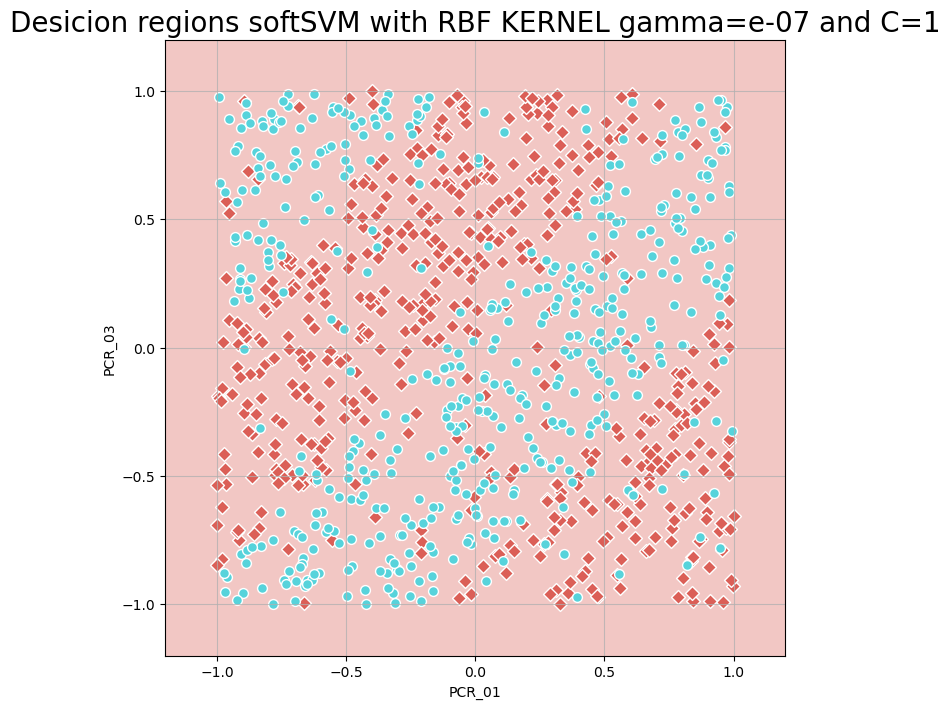

In [ ]:
from sklearn.svm import SVC

# Extract the features and target variable
X = PCR_01_03_train_set
y = spread_col

# Train the SVM model
svm = SVC(kernel='rbf', C=1, gamma=1e-7)
svm.fit(X, y)

visualize_clf(svm, PCR_01_03_train_set, train_set["spread"], "Desicion regions softSVM with RBF KERNEL gamma=e-07 and C=1", "PCR_01", "PCR_03")


In [ ]:
print(spread_col.value_counts()[1])
print(spread_col.value_counts()[-1])


484
516


c:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


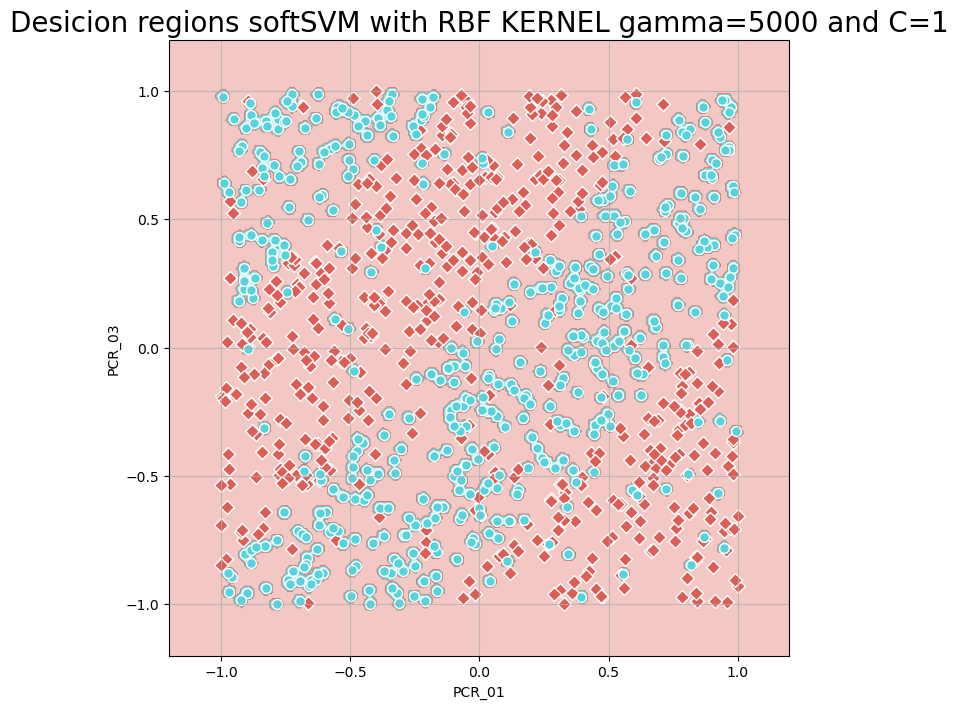

In [ ]:
from sklearn.svm import SVC

# Extract the features and target variable
X = PCR_01_03_train_set
y = spread_col

# Train the SVM model
svm_svc_gamma5000 = SVC(kernel='rbf', C=1, gamma=5000)
svm_svc_gamma5000.fit(X, y)

visualize_clf(svm_svc_gamma5000, PCR_01_03_train_set, train_set["spread"], "Desicion regions softSVM with RBF KERNEL gamma=5000 and C=1", "PCR_01", "PCR_03")

Text(0.5, 1.2, 'Joint Plot of PCR_02 and PCR_06')

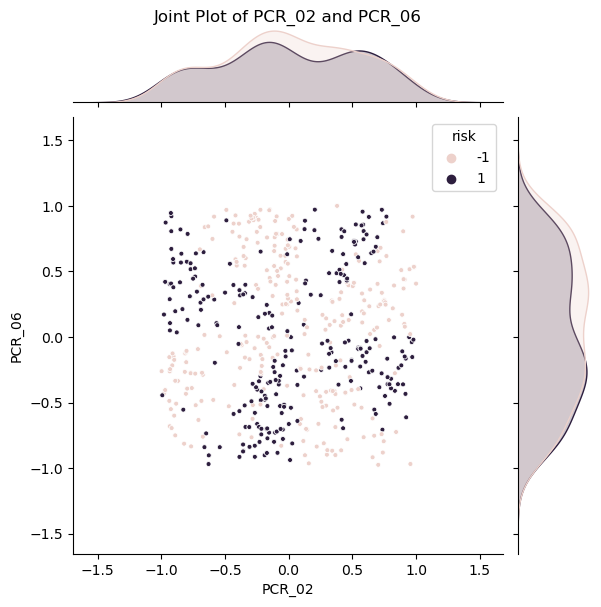

In [ ]:
# Filter train set
train_temp = train_set[(train_set['SpecialProperty'] == -1)]
train_temp = train_temp[['PCR_02', 'PCR_06', 'risk']]

# Filter test set
test_temp = test_set[(test_set['SpecialProperty'] == -1)]
test_temp = test_temp[['PCR_02', 'PCR_06', 'risk']]

# Plot jointplot
import seaborn as sns

sns.jointplot(data=train_temp, x='PCR_02', y='PCR_06', hue='risk', marker='.', s=50)
plt.title('Joint Plot of PCR_02 and PCR_06', y=1.2)


In [ ]:
import numpy as np

# Calculate the angle in radians
train_set['angle'] = np.arctan2(train_set['PCR_06'], train_set['PCR_02'])
test_set['angle'] = np.arctan2(test_set['PCR_06'], test_set['PCR_02'])

# Display the updated dataframe
print(train_set['angle'])


885    -1.636100
836    -1.706180
1079   -0.776606
287    -2.571261
299     2.501274
          ...   
240    -1.014359
236    -1.932155
202     1.049284
932     1.540158
831     1.707790
Name: angle, Length: 1000, dtype: float64


Text(0.5, 1.0, 'Density Plot of the angle feature')

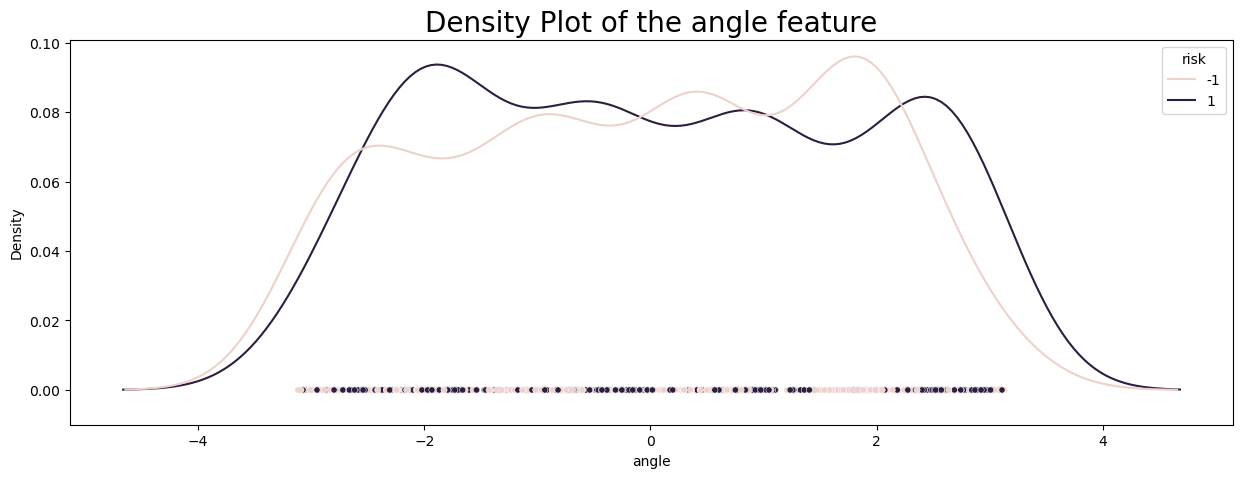

In [ ]:
Xtrain=train_set[['angle', 'risk']]
plt.figure(figsize=(15, 5))
sns.scatterplot(data=Xtrain, x='angle', y=[0]*Xtrain.shape[0], hue='risk', s=20)
sns.kdeplot(data= Xtrain, x='angle', hue='risk', common_norm=True, fill=False)
plt.ylim(bottom=-1e-2)
plt.title('Density Plot of the angle feature', fontsize=20)


C:\Users\Dell\AppData\Local\Temp\ipykernel_52136\1055351731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['sin_angle'] = np.sin(beta*Xtrain['angle'])


Text(0.5, 1.0, 'Density Plot of the sinangle feature')

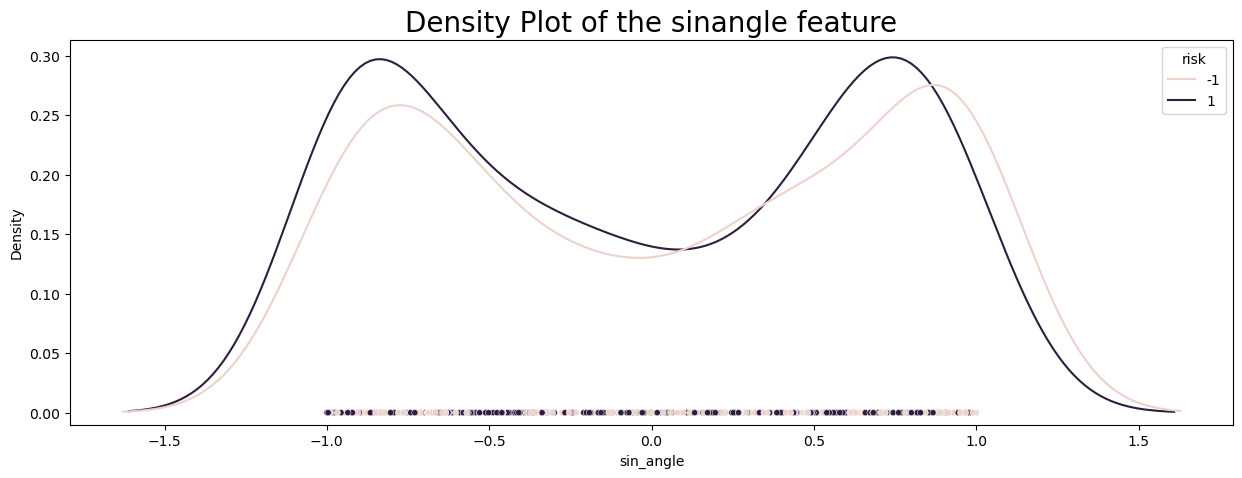

In [ ]:
beta=1
Xtrain['sin_angle'] = np.sin(beta*Xtrain['angle'])

plt.figure(figsize=(15, 5))
sns.scatterplot(data=Xtrain, x='sin_angle', y=[0]*Xtrain.shape[0], hue='risk', s=20)
sns.kdeplot(data= Xtrain, x='sin_angle', hue='risk', common_norm=True, fill=False)
plt.ylim(bottom=-1e-2)
plt.title('Density Plot of the sinangle feature', fontsize=20)

Training Accuracy: 0.673
Test Accuracy: 0.704


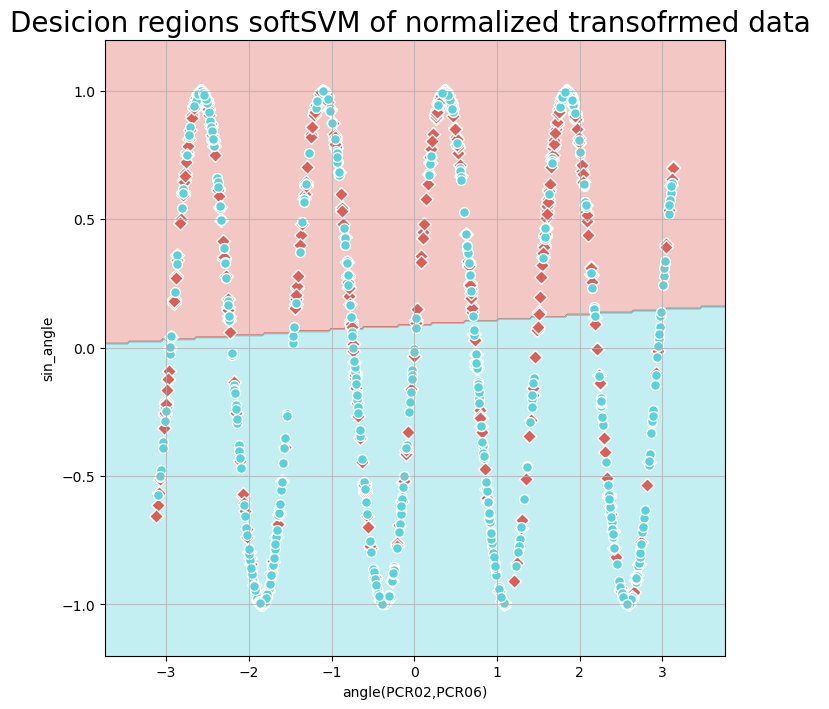

In [156]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

# Adjust the beta value
beta = 4.26

X_train=train_set[['angle', 'risk']]
X_test=test_set[['angle', 'risk']]
y_train = X_train['risk']
y_test = X_test['risk']

# X_train['sin_angle'] = np.sin(beta*X_train['angle'])
# X_test['sin_angle'] = np.sin(beta*X_test['angle'])

# X_train = X_train[['sin_angle', 'risk']]
# X_test = X_test[['sin_angle', 'risk']]

# Normalize the mapped features
X_train_normalized = np.column_stack((X_train['angle'], np.sin(beta * X_train['angle'])))
X_test_normalized = np.column_stack((X_test['angle'], np.sin(beta * X_test['angle'])))

# Create a pipeline with MinMaxScaler and LinearSVC
model_updated = Pipeline([
    ('scaler', MinMaxScaler()),
    ('svm', LinearSVC())
])

# Train the model on the updated mapping
model_updated.fit(X_train_normalized, y_train)

# Calculate the training and test accuracies
train_accuracy = model_updated.score(X_train_normalized, y_train)
test_accuracy = model_updated.score(X_test_normalized, y_test)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)



visualize_clf(model_updated, X_train_normalized, train_set["risk"], "Desicion regions softSVM of normalized transofrmed data ", "angle(PCR02,PCR06)", "sin_angle")
